**Brief:** In electronics, a **wafer** (also called a slice or substrate) is a thin slice of semiconductor, such as a crystalline silicon (c-Si), used for the fabrication of integrated circuits and, in photovoltaics, to manufacture solar cells. The wafer serves as the substrate(serves as foundation for contruction of other components) for microelectronic devices built in and upon the wafer. 

It undergoes many microfabrication processes, such as doping, ion implantation, etching, thin-film deposition of various materials, and photolithographic patterning. Finally, the individual microcircuits are separated by wafer dicing and packaged as an integrated circuit.



## Problem Statement

**Data:** Wafers data


**Problem Statement:** Wafers are predominantly used to manufacture solar cells and are located at remote locations in bulk and they themselves consist of few hundreds of sensors. Wafers are fundamental of photovoltaic power generation, and production thereof requires high technology. Photovoltaic power generation system converts sunlight energy directly to electrical energy.

The motto behind figuring out the faulty wafers is to obliterate the need of having manual man-power doing the same. And make no mistake when we're saying this, even when they suspect a certain wafer to be faulty, they had to open the wafer from the scratch and deal with the issue, and by doing so all the wafers in the vicinity had to be stopped disrupting the whole process and this is when that certain wafer was indeed faulty, however, when their suspicion came outta be false negative, then we can only imagine the waste of time, man-power and ofcourse, cost incurred.

**Solution:** Data fetched by wafers is to be passed through the machine learning pipeline and it is to be determined whether the wafer at hand is faulty or not apparently obliterating the need and thus cost of hiring manual labour.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('F:\DATA SCIENCE\Projects\Wafer Fault Project\\notebooks\Data\wafer_23012020_041211.csv')
print('The shape of the dataset is : {}'.format(df.shape))
df.head()

The shape of the dataset is : (100, 592)


,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 592 entries, Unnamed: 0 to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 462.6+ KB


In [4]:
df.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,99.000000,100.000000,97.000000,97.000000,97.000000,97.0,97.000000,97.000000,100.000000,100.000000,...,34.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3017.301212,2487.180300,2202.168281,1484.362181,1.180367,100.0,97.449088,0.122195,1.461516,0.000243,...,74.331709,0.499390,0.013615,0.003549,2.727297,0.023510,0.014875,0.004685,77.430241,-0.880000
std,71.819707,66.954212,30.350606,460.985871,0.349654,0.0,5.553324,0.002006,0.071300,0.010610,...,41.857728,0.003431,0.004344,0.000873,0.875848,0.011991,0.007557,0.002527,55.106166,0.477367
min,2825.670000,2254.990000,2114.666700,978.783200,0.753100,100.0,83.423300,0.116000,1.317900,-0.027900,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2973.040000,2446.595000,2189.966700,1111.543600,0.837300,100.0,95.108900,0.120800,1.407375,-0.006925,...,47.356000,0.497300,0.011300,0.003075,2.270425,0.013400,0.009475,0.002700,33.787600,-1.000000
50%,3004.390000,2493.890000,2200.988900,1244.289900,1.156900,100.0,99.513300,0.122200,1.453700,0.001000,...,65.127550,0.499400,0.012750,0.003400,2.546400,0.021800,0.013900,0.003850,62.059500,-1.000000
75%,3070.385000,2527.525000,2213.211100,1963.801600,1.383000,100.0,101.457800,0.123400,1.507425,0.008125,...,99.419050,0.501525,0.014700,0.003825,2.953750,0.028025,0.019200,0.005900,104.303400,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.207300,100.0,107.152200,0.126200,1.641100,0.025000,...,223.101800,0.508700,0.043700,0.008900,8.816000,0.054500,0.040100,0.015000,223.101800,1.000000


From the above description of the dataset we can see that there are outliers present in the dataset therefore standardization of the features will be an important step.

In [5]:
from sklearn.model_selection import train_test_split
wafers_train,wafer_test=train_test_split(df,test_size=0.20,random_state=42)

In [6]:
wafers_train

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
55,Wafer-856,NaN,2532.45,2191.1333,2197.6570,1.1569,100.0,89.7222,0.1251,1.5762,...,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034,-1
88,Wafer-889,3221.21,2391.20,2189.9667,1046.6212,0.8662,100.0,102.3622,0.1208,1.4756,...,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601,-1
26,Wafer-827,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.0,100.7744,0.1234,1.5590,...,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577,-1
42,Wafer-843,2982.07,2447.06,2199.6334,1242.8420,1.4083,100.0,99.2178,0.1221,1.4542,...,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018,-1
69,Wafer-870,3058.08,2524.60,2192.3778,1110.5453,0.8147,100.0,99.2922,0.1226,1.4958,...,24.6547,0.4974,0.0171,0.0040,3.4352,0.0218,0.0054,0.0020,24.6547,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Wafer-861,3071.05,2642.15,2200.9889,1054.5240,1.3830,100.0,100.1800,0.1201,1.4532,...,NaN,0.4973,0.0139,0.0039,2.7851,0.0122,0.0131,0.0039,107.5257,-1
71,Wafer-872,3043.18,2545.53,2192.3778,1110.5453,0.8147,100.0,99.2922,0.1226,1.3824,...,NaN,0.4989,0.0131,0.0036,2.6253,0.0218,0.0054,0.0020,24.6547,-1
14,Wafer-815,3001.26,2519.92,2224.6778,1308.6479,1.3907,100.0,101.1333,0.1208,1.5172,...,48.4818,0.4959,0.0142,0.0037,2.8609,0.0278,0.0135,0.0042,48.4818,-1
92,Wafer-893,3007.00,2572.62,2213.2111,2070.7147,1.9705,100.0,87.7411,0.1232,1.4446,...,NaN,0.4987,0.0172,0.0041,3.4417,0.0195,0.0149,0.0047,76.0035,-1


In [7]:
wafers_train['Good/Bad'].value_counts()

Good/Bad
-1    74
 1     6
Name: count, dtype: int64

### Insights:
Heavily imbalanced dataset therefore resampling is important

##### checking for missing values in the target column

In [8]:
## missing values check:
wafers_train['Good/Bad'].isna().sum()

0

There are no missing values in the output column of our dataset

In [9]:
wafers_train.isna().sum().sum()


1822

### Visualising the sensor values 

Visualising the values of the first 50 sensors of the dataset as we have information of 590 sensors

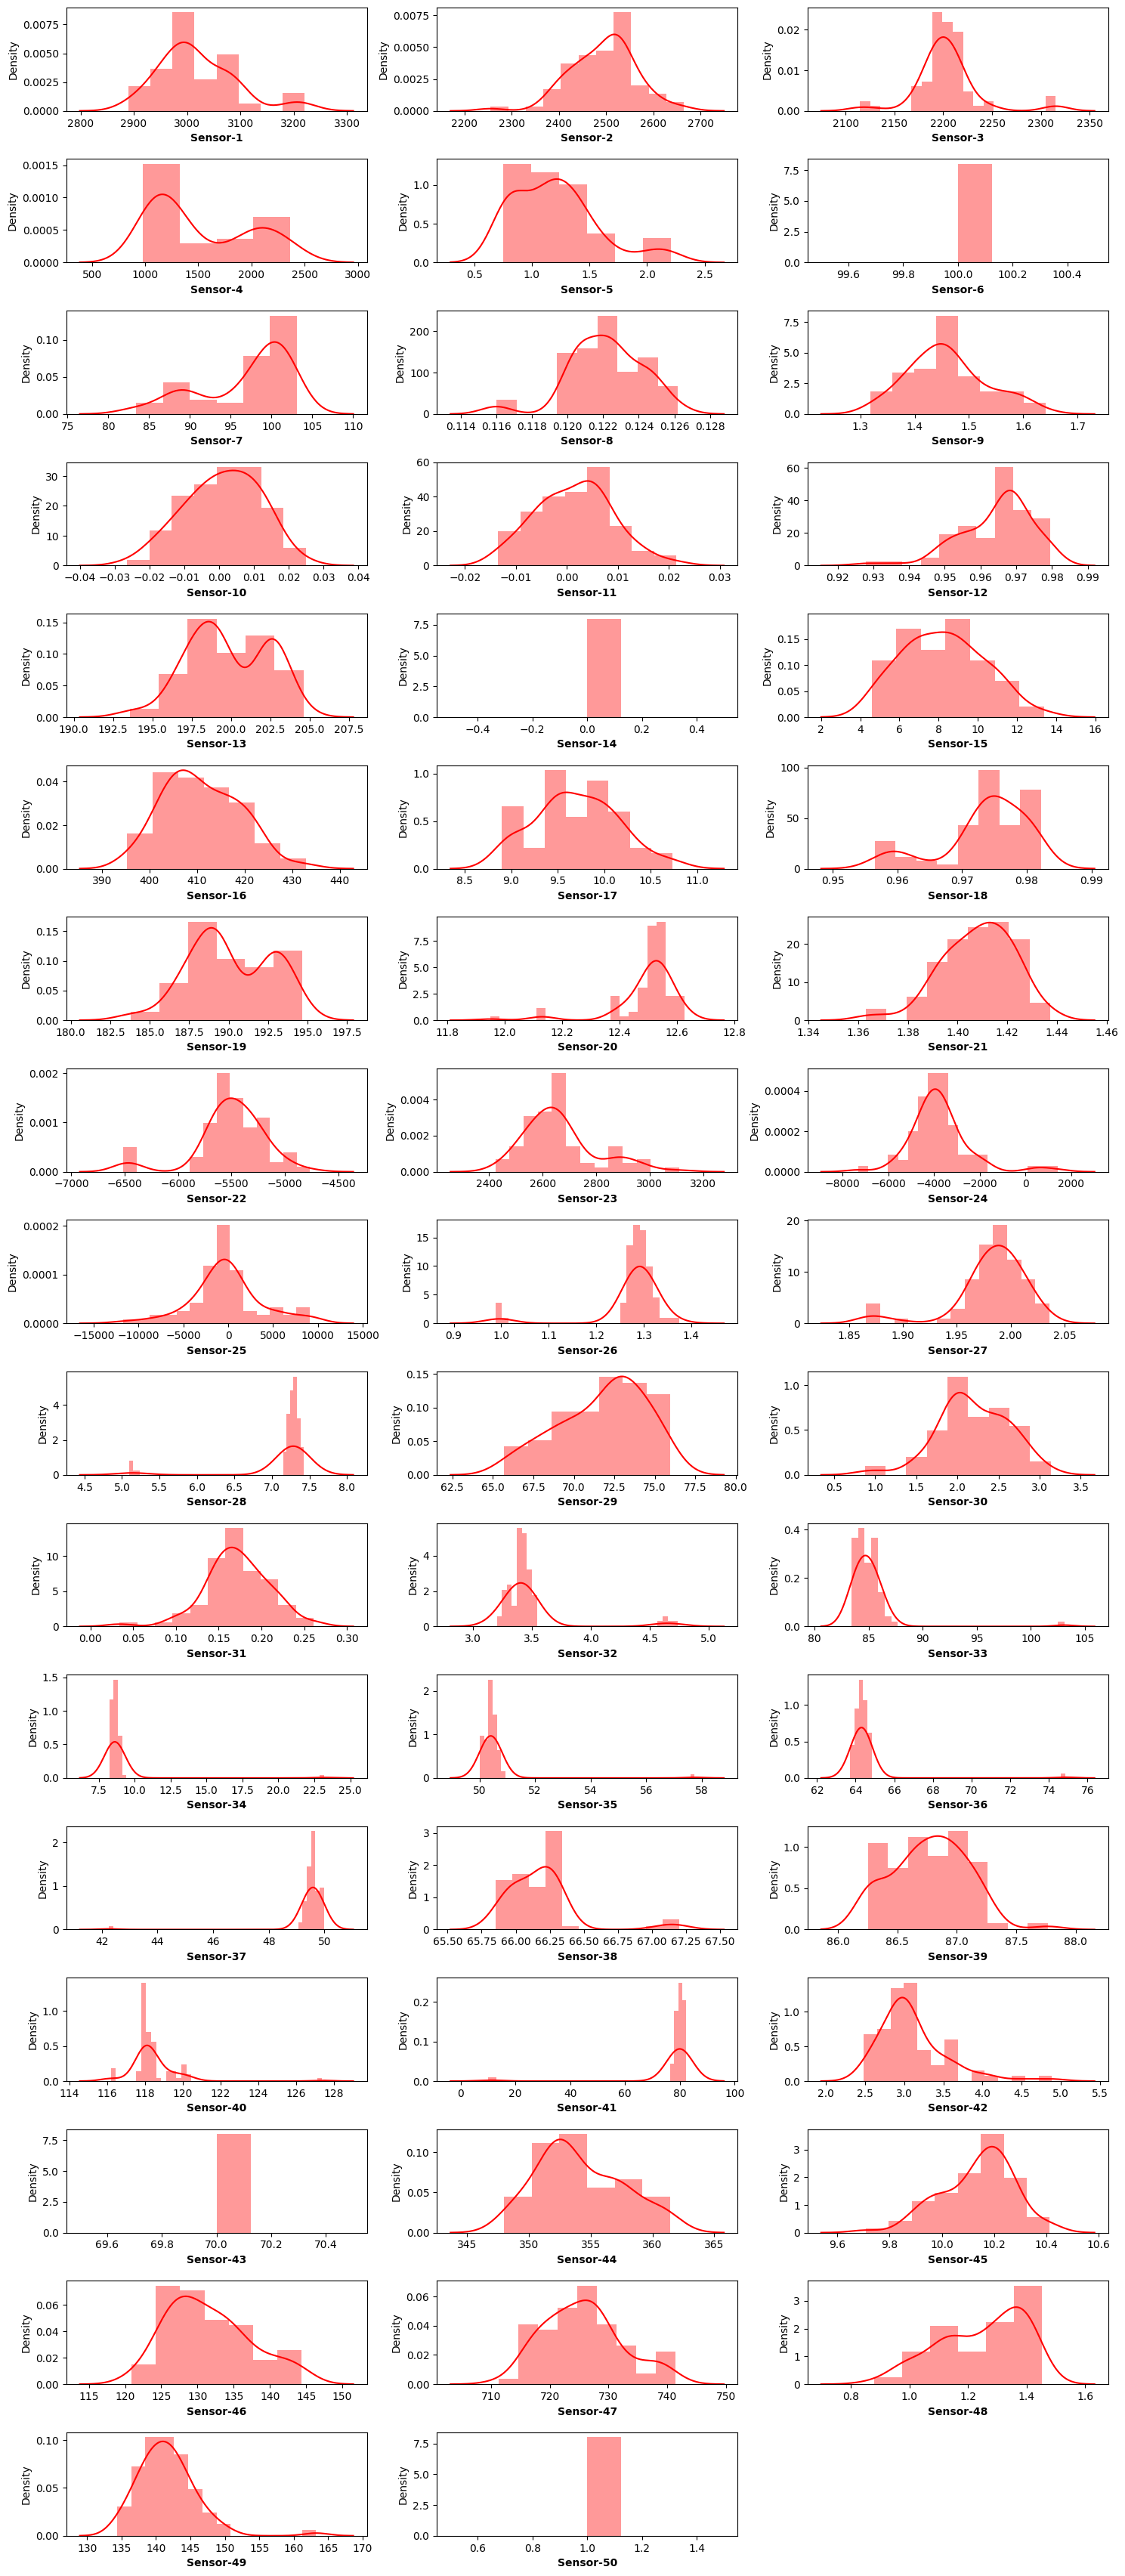

In [10]:

plt.figure(figsize=(15,120))
for i,col in enumerate(wafers_train.columns[1:51]):
    plt.subplot(60,3,i+1)
    sns.distplot(x=wafers_train[col], color='r',kde=True)
    plt.xlabel(col,weight='bold')
    plt.tight_layout()

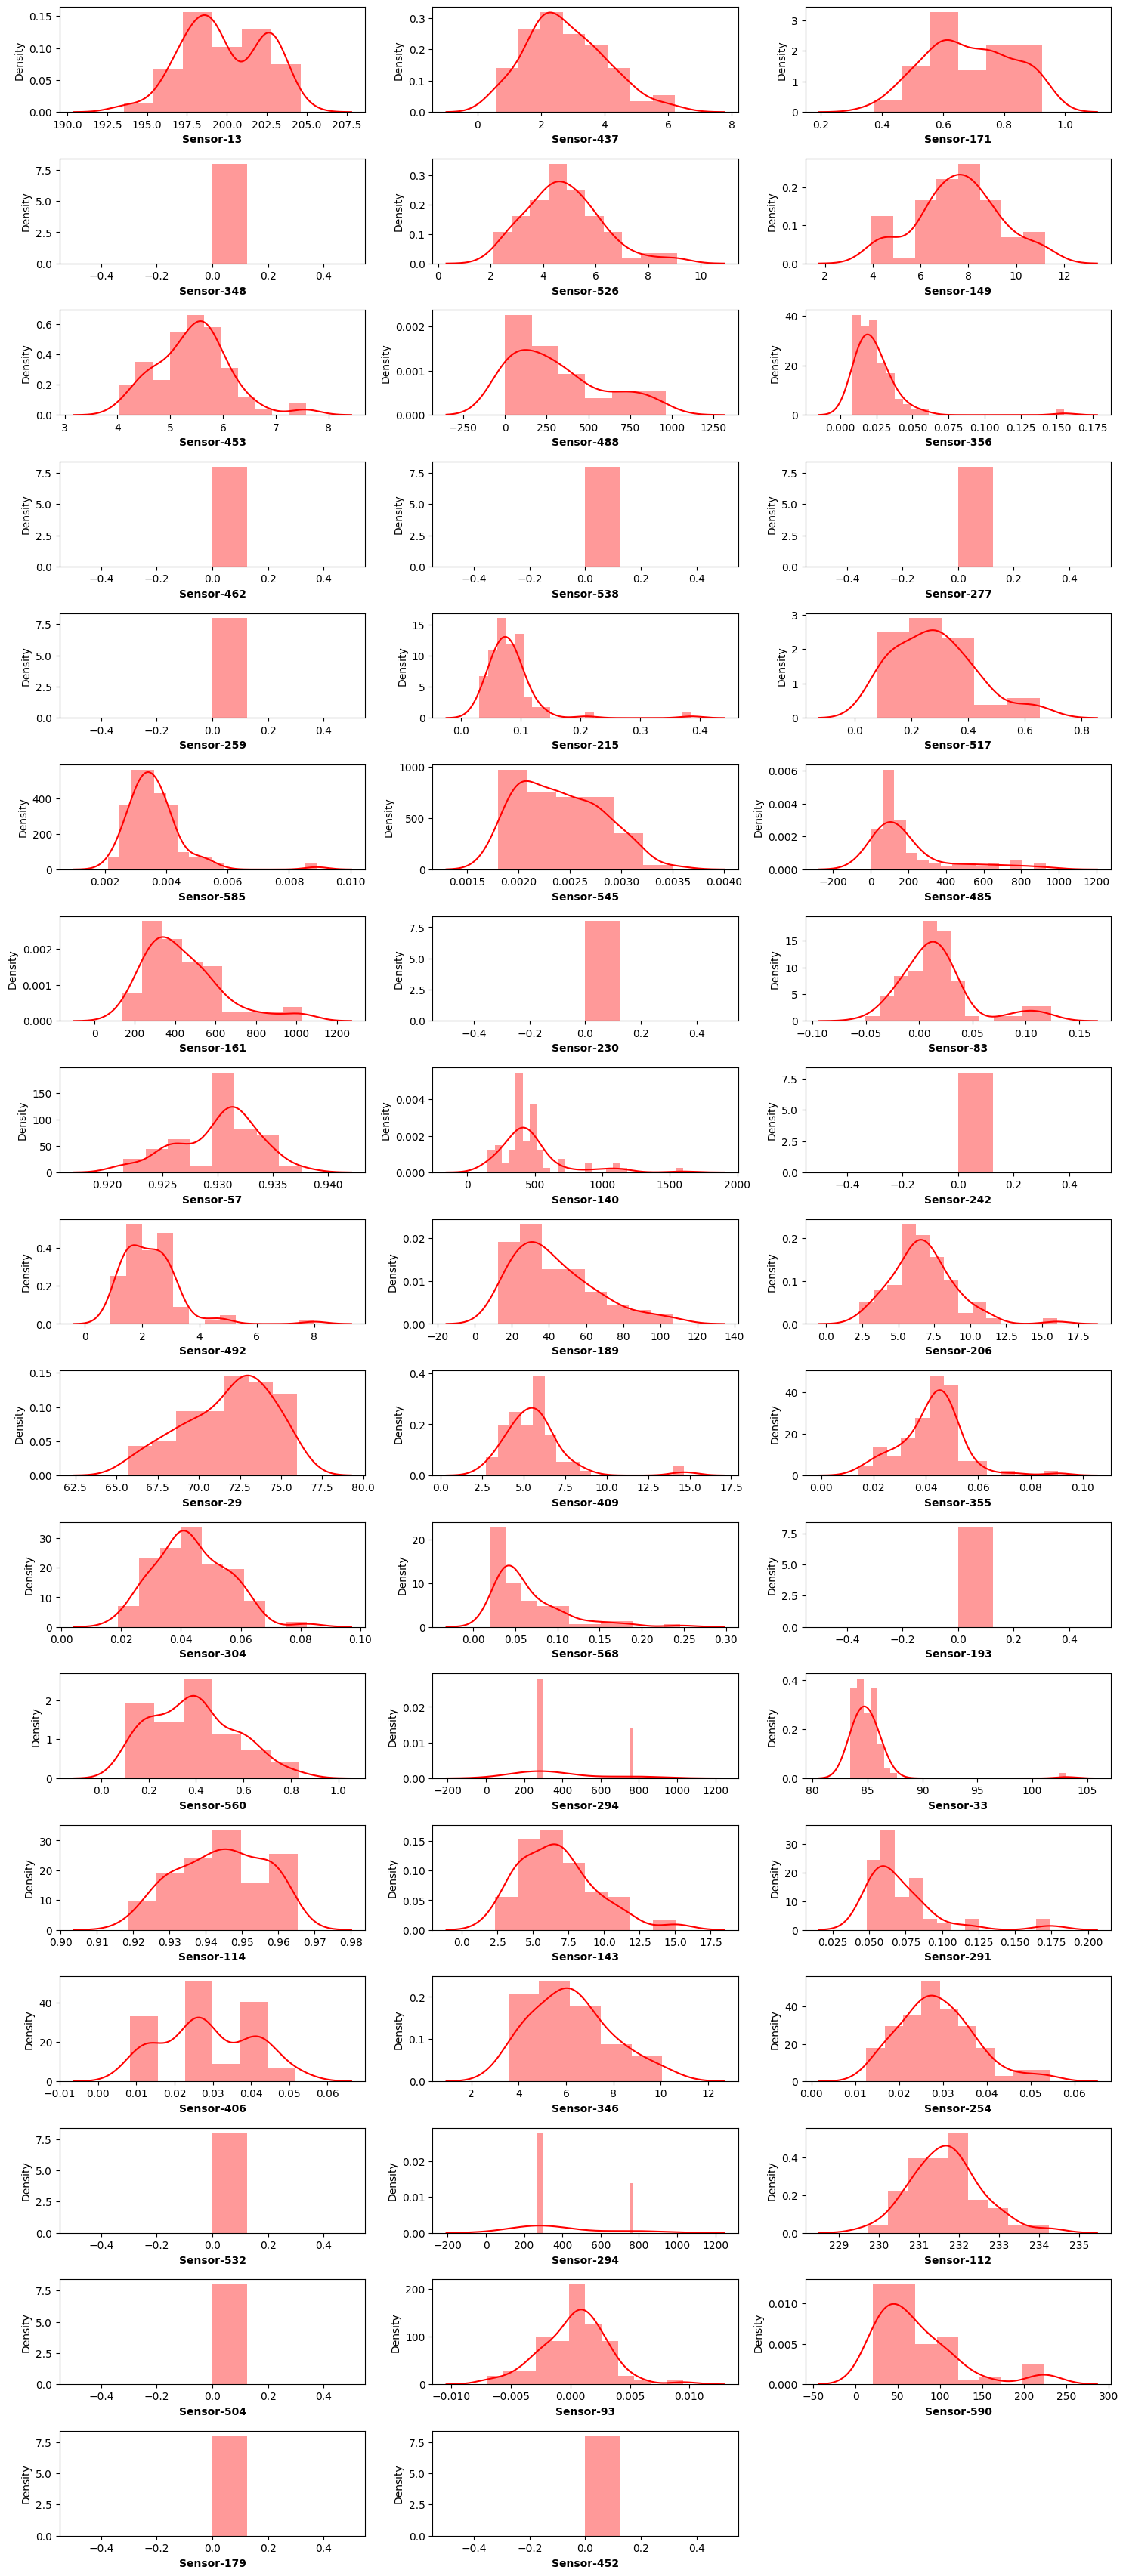

In [11]:
## sensor value distribution for random 50 sensors
plt.figure(figsize=(15,120))
for i,col in enumerate(wafers_train.columns[np.random.randint(1,591,50)]):
    plt.subplot(60,3,i+1)
    sns.distplot(x=wafers_train[col], color='r',kde=True)
    plt.xlabel(col,weight='bold')
    plt.tight_layout()

#### Insights:

There are many features in the first 50 sensors or the randomly chosen sensors with normal distribution (0 standard deviation) but many of them are left or right skewed that means having outliers.

It is imposible to analyse each sensor and then trat each of them thus we have to standardise all the data points .. robust scaling is the technique that can be implemented here.

## Handling the missing values

In [12]:

df['Good/Bad'].isnull().sum()

0

There are no missing values in the target column

We'll drop the columns that have zero standard deviation and also the columns that have missing values greater than a perticular threshold value


In [13]:
'''This perticular function takes in our dataframe and returns the column swith 0 standard deviation'''
def cols_with_zero_std(df:pd.DataFrame):
    cols_to_drop=[]
    num_cols=[cols for cols in df.columns if df[cols].dtype!='O']
    for col in num_cols:
        if df[col].std()==0:
            cols_to_drop.append(col)
    return cols_to_drop

'''This function takes in our dataframe and a threshold value and returns the column contains missing values greater than the threshold value'''

def cols_missing_vals(df:pd.DataFrame,thresh=0.7):
    missing_ratio=df.isna().sum().div(df.shape[0]) # provides us a series with the amount of missing ratio per column
    cols_to_drop=list(missing_ratio[missing_ratio>thresh].index)
    return cols_to_drop


In [14]:
cols_to_drop1=cols_missing_vals(df,thresh=0.7)
cols_to_drop1

['Sensor-158', 'Sensor-159', 'Sensor-293', 'Sensor-294']

In [15]:
cols_to_drop2=cols_with_zero_std(df)
cols_to_drop2

['Sensor-6',
 'Sensor-14',
 'Sensor-43',
 'Sensor-50',
 'Sensor-53',
 'Sensor-70',
 'Sensor-75',
 'Sensor-98',
 'Sensor-142',
 'Sensor-150',
 'Sensor-179',
 'Sensor-180',
 'Sensor-187',
 'Sensor-190',
 'Sensor-191',
 'Sensor-192',
 'Sensor-193',
 'Sensor-194',
 'Sensor-195',
 'Sensor-207',
 'Sensor-210',
 'Sensor-227',
 'Sensor-230',
 'Sensor-231',
 'Sensor-232',
 'Sensor-233',
 'Sensor-234',
 'Sensor-235',
 'Sensor-236',
 'Sensor-237',
 'Sensor-238',
 'Sensor-241',
 'Sensor-242',
 'Sensor-243',
 'Sensor-244',
 'Sensor-257',
 'Sensor-258',
 'Sensor-259',
 'Sensor-260',
 'Sensor-261',
 'Sensor-262',
 'Sensor-263',
 'Sensor-264',
 'Sensor-265',
 'Sensor-266',
 'Sensor-267',
 'Sensor-277',
 'Sensor-285',
 'Sensor-314',
 'Sensor-315',
 'Sensor-316',
 'Sensor-323',
 'Sensor-326',
 'Sensor-327',
 'Sensor-328',
 'Sensor-329',
 'Sensor-330',
 'Sensor-331',
 'Sensor-343',
 'Sensor-348',
 'Sensor-365',
 'Sensor-370',
 'Sensor-371',
 'Sensor-372',
 'Sensor-373',
 'Sensor-374',
 'Sensor-375',
 'Se

Lets get all the columns that have to be dropped

In [16]:
cols_to_drop=cols_to_drop1+cols_to_drop2

Let's seperate the dependant and independant features and remove the unwanted columns as well


In [17]:
X,y=df.drop(cols_to_drop,axis=1),df[['Good/Bad']]

In [18]:
X=X.drop(['Unnamed: 0','Good/Bad'],axis=1)
print(X.shape)
X.head()

(100, 464)


,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590
0,2968.33,2476.58,2216.7333,1748.0885,1.1127,97.5822,0.1242,1.5300,-0.0279,-0.0040,...,NaN,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876
1,2961.04,2506.43,2170.0666,1364.5157,1.5447,96.7700,0.1230,1.3953,0.0084,0.0062,...,NaN,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876
2,3072.03,2500.68,2205.7445,1363.1048,1.0518,101.8644,0.1220,1.3896,0.0138,0.0000,...,NaN,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876
3,3021.83,2419.83,2205.7445,1363.1048,1.0518,101.8644,0.1220,1.4108,-0.0046,-0.0024,...,NaN,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876
4,3006.95,2435.34,2189.8111,1084.6502,1.1993,104.8856,0.1234,1.5094,-0.0046,0.0121,...,NaN,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876


In [19]:
y

,Good/Bad
0,-1
1,1
2,-1
3,-1
4,-1
...,...
95,-1
96,1
97,-1
98,-1


In [21]:
X.shape

(100, 464)

## Creating Data Transformation Pipeline

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()
imputer=KNNImputer(n_neighbors=3)
preprocessing_pipeline=Pipeline(steps=[('Scaler',scaler),('Imputer',imputer)])
preprocessing_pipeline

Pipeline(steps=[('Scaler', RobustScaler()),
                ('Imputer', KNNImputer(n_neighbors=3))])

In [24]:
X_trans=preprocessing_pipeline.fit_transform(X)
print(X_trans.shape)
X_trans

(100, 464)


array([[-0.37043505, -0.21388855,  0.67734164, ...,  0.46272494,
         0.515625  , -0.40093   ],
       [-0.44532333,  0.15494872, -1.33031182, ...,  0.46272494,
         0.515625  , -0.40093   ],
       [ 0.69484822,  0.08389967,  0.20459121, ...,  0.46272494,
         0.515625  , -0.40093   ],
       ...,
       [ 0.82623658, -1.31558137, -1.26864535, ..., -0.93573265,
        -0.671875  , -0.44021198],
       [-0.49843341,  0.59310515,  0.70458978, ..., -0.93573265,
        -0.671875  , -0.44021198],
       [-0.91971853, -0.35561596,  0.39961883, ..., -0.93573265,
        -0.671875  , -0.44021198]])

In [27]:
y.value_counts()

Good/Bad
-1          94
 1           6
Name: count, dtype: int64

Highly imbalanced dataset 

In [29]:
from imblearn.combine import SMOTETomek
resampler=SMOTETomek(sampling_strategy="auto")
X_res,y_res=resampler.fit_resample(X_trans,y)

In [30]:
X_res.shape

(188, 464)

In [31]:
y.shape

(100, 1)